# **Define the problem ?**

**it is a classification problem that depend on multi-modality because there are two features have different data types such as text and image ,and also depend on multi-task because we predict two labels the price of real estate and it's type of real estate**

# **What is the input?**

**we have two input features , the image of real estate and summary of real estate**

# **What is the output?**

**we have two output , the price of real estate and it's type.**

# **What data mining function is required?**

**the function is prediction and classification**

# **What could be the challenges?**

**1. we have two features and predict two labels**

**2. the summary feature have a different language**

**3. imbalance labels**

**4. when drop Null and Duplication from train and test data , the data become very small**

**5. make preprocessing on different type of data**

# **What is the impact?**

**the model will help the hosts to determine the suitable price for their real estate and the hosts will be able to sell their real estate easily**

# **What is an ideal solution?**

**the ideal solution for me is is building neural network with dropout technique, 
the accuracy on validation data is 0.6951**

# **What is the experimental protocol used and how was it carried out?**
**1-  import the required libraries**

**2- read the train and test data** 

**3- make some visualization on data** 

**4- make preprocessing on data**


  * remove null values and remove duplication
     
  * translate the text into English
     
  * apply lemmatization process on text
     
  * tokenize the text of summary feature
     


    

**5- building set of models** 
  
 **6- train each model**
  
 **7- make prediction**
  
 **8- building the submittion file**

# **How did we tune hyper-parameters in the template? What is the search space and what is the criteria to determine good/bad hyper-parameters?**


* **Tuning the hyperparameters is an important aspect of building a machine learning model, as they can have a significant impact on the model's performance.**
* **we used a technique called grid search, which involves specifying a range of values for each hyperparameter and then systematically trying all possible combinations of these values**
* **To determine good/bad hyperparameters, we typically use a metric that measures the performance of the model on a validation set. For example, we might use the accuracy or F1 score for a classification task, or the mean squared error or R-squared for a regression task.**

# **Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?**

**- it is not good for sequential data because the sequential data is dependant,and the neural network deal with data as non-sequential data** 

**- it is not good for image because it is not good to deal with feature extraction , so that there are many parameters which may lead to overfitting**

# **What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?**

* **Gradient vanishing occurs when the gradients of the loss function with respect to the parameters of the network become very small as they are backpropagated through the network, making it difficult for the network to update the parameters and learn**
* **Gradient explosion occurs when the gradients become very large during backpropagation, causing the weights to update too much and leading to instability and divergence**
*  **In both GRU and LSTM, there are gates that control the flow of information through the network, allowing it to selectively remember or forget information from previous time steps. These gates are learned during training and help to mitigate the problems of vanishing and exploding gradients by allowing the network to selectively propagate or block gradients through time.**

# **What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?**

* **multi-objective/multi-task learning mean that make prediction on multiple lable , not one label , in the assignment we make prediction of price of real estate and it's type .**
* **multi-modality learning mean the features have different datatypes ,in the assignment ,there are two different features , they are the summary that represent in form of text and image of real estate**

# **What is the difference among xgboost, lightgbm and catboost ?**

* **XGBoost is designed to be highly scalable and efficient, using a variety of optimization techniques such as parallelization, cache awareness, and regularization to improve performance. XGBoost uses a tree-based model, where each tree is built using a greedy algorithm that selects the best split at each node based on the gradient of the loss function.**

* **A framework for gradient boosting called LightGBM (Light Gradient Boosting Machine). Gradient-based One-Side Sampling (GOSS), a Gradient-edge method, is utilised to reduce the number of data points required to train each tree, making it even more effective than XGBoost. Although LightGBM similarly use a tree-based model, it implements split finding differently from XGBoost, relying instead on a histogram-based strategy that may be more effective for sparse data sets.**
* **A weighted sample variation of stochastic gradient boosting, known as minimal variance sampling (MVS), is provided by Catboost.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#import the required libraries
# the basic libraries
import pandas as pd
import numpy as np
import os 
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
import tensorflow as tf
# libraries for dealing with deep learning 
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, LSTM, Dropout, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint
from tensorflow.keras.preprocessing.text import Tokenizer
# for dealing with nlp 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('wordnet')
# for text translation 
!pip install googletrans
!pip install googletrans==3.1.0a0 --user
from googletrans import Translator
import cv2
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# read the data (train,test)
train=pd.read_csv("/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv")
test=pd.read_csv("/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv")

In [ ]:
# show the train data
train

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


* there are 7627 samples in train data 
* there are features such as summary, image path
* the labels are type and the price 

In [ ]:
# show the test data
test 

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg
...,...,...,...
7355,7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg
7356,7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg
7357,7628,"My place is close to parks, . My place is good...",img_test/7629.jpg
7358,7629,"*** For security reasons, I will prioritize gu...",img_test/7630.jpg


* there are 7360 samples in test data 
* there are features such as id,summary, image path
* No labels in test data

In [ ]:
# make a description on train data 
train.describe

<bound method NDFrame.describe of                                                 summary               image  \
0     Spacious, sunny and cozy modern apartment in t...     img_train/0.jpg   
1     Located in one of the most vibrant and accessi...     img_train/1.jpg   
2     Logement coquet et douillet à 10 minutes du ce...     img_train/2.jpg   
3     Beautiful and spacious (1076 sc ft, / 100 mc) ...     img_train/3.jpg   
4     Très grand appartement ''rustique'' et très ag...     img_train/4.jpg   
...                                                 ...                 ...   
7622  Un grand logement 4 et 1/2, tout inclut, bien ...  img_train/7626.jpg   
7623  Magnificent condo directly on the river. You w...  img_train/7627.jpg   
7624  This apartment is perfect for anyone visiting ...  img_train/7628.jpg   
7625  It is a cozy ,clean ,and comfortable apartment...  img_train/7629.jpg   
7626  Modern country style (newly-renovated); open c...  img_train/7630.jpg   

           type  

In [ ]:
# make a description on test data 
train.describe

<bound method NDFrame.describe of                                                 summary               image  \
0     Spacious, sunny and cozy modern apartment in t...     img_train/0.jpg   
1     Located in one of the most vibrant and accessi...     img_train/1.jpg   
2     Logement coquet et douillet à 10 minutes du ce...     img_train/2.jpg   
3     Beautiful and spacious (1076 sc ft, / 100 mc) ...     img_train/3.jpg   
4     Très grand appartement ''rustique'' et très ag...     img_train/4.jpg   
...                                                 ...                 ...   
7622  Un grand logement 4 et 1/2, tout inclut, bien ...  img_train/7626.jpg   
7623  Magnificent condo directly on the river. You w...  img_train/7627.jpg   
7624  This apartment is perfect for anyone visiting ...  img_train/7628.jpg   
7625  It is a cozy ,clean ,and comfortable apartment...  img_train/7629.jpg   
7626  Modern country style (newly-renovated); open c...  img_train/7630.jpg   

           type  

In [ ]:
# get the frequency for each class in price label in train data 
train['price'].value_counts()

0    4737
1    2403
2     487
Name: price, dtype: int64

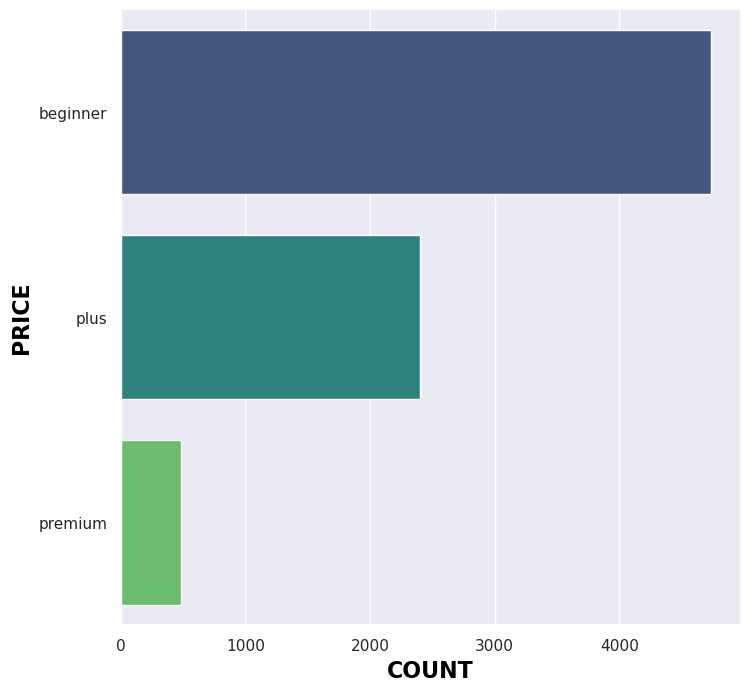

In [ ]:
# plot the frequency for each class in price label in train data
"""
0 in price represent beginner
1 in price represent plus
2 in price represent premium
"""
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
ax=sns.countplot(y = 'price',data =train,order = train['price'].value_counts().index,palette = "viridis")
ax.set_yticklabels(['beginner', 'plus', 'premium'])
plt.ylabel('PRICE',fontsize = 16, weight = 'bold',color='black')
plt.xlabel('COUNT',fontsize = 16, weight = 'bold',color='black')
plt.show()

In [ ]:
# get the frequency for each class in type label in train data 
train['type'].value_counts()

Apartment                 5765
Condominium                691
House                      406
Loft                       324
Townhouse                  167
Serviced apartment          77
Bed and breakfast           38
Guest suite                 32
Hostel                      26
Bungalow                    25
Guesthouse                  14
Cottage                     12
Aparthotel                  12
Boutique hotel              10
Other                        8
Villa                        7
Tiny house                   3
Boat                         2
Cabin                        2
Camper/RV                    2
Casa particular (Cuba)       1
Hotel                        1
Earth house                  1
Castle                       1
Name: type, dtype: int64

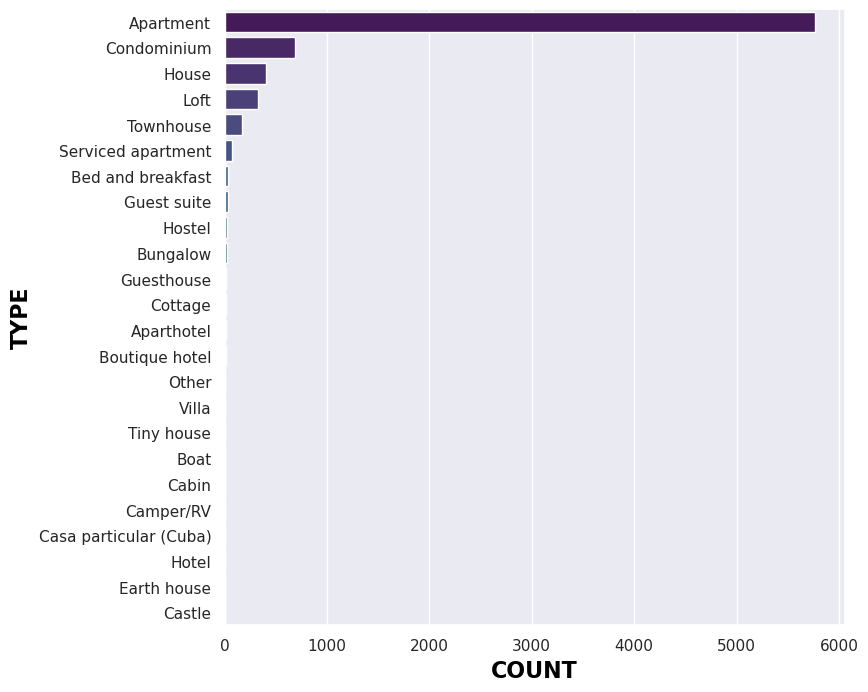

In [ ]:
# plot the frequency for each class in type label in train data 
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'type',data =train,order = train['type'].value_counts().index,palette = "viridis")
plt.ylabel('TYPE',fontsize = 16, weight = 'bold',color='black')
plt.xlabel('COUNT',fontsize = 16, weight = 'bold',color='black')
plt.show()

In [ ]:
# check null values in train data 
train.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [ ]:
# remove null values in train data 
train=train.dropna()

In [ ]:
# check null values in train data after removing null values 
train.isnull().sum().sum()

0

In [ ]:
# check null values in test data 
test.isnull().sum().sum()

0

* No Null Values in Test Data 

In [ ]:
# check duplication in train data
train.duplicated().sum() 

0

In [ ]:
# check duplication in test data
test.duplicated().sum()

0

No data duplicated in train and test data

In [ ]:
# make encoding on type label
train["type"]=train.type.astype('category').cat.codes

In [ ]:
# show type label after encoding
train["type"]

0        1
1        1
2        1
3        1
4        1
        ..
7622     1
7623     1
7624     1
7625     1
7626    17
Name: type, Length: 7326, dtype: int8

In [ ]:
# getting the length of unique values for "type" label
length_of_type=len(train.type.unique())

In [ ]:
# print the length
length_of_type

24

In [ ]:
# getting the length of unique values for "price" label
length_of_price=len(train.type.unique())

In [ ]:
# print the length
length_of_price

24

In [ ]:
# translator 
"""
 using the Google Translate API through the "googletrans" module to 
 translate the text data in the "summary" column of a DataFrame. 
 Specifically, it is using the "apply" method to apply the translation 
 function to each element in the "summary" column.
"""
from googletrans import Translator
translator = Translator()
train.summary=train.summary.apply(lambda x:translator.translate(x,dest='en').text)
test.summary=test.summary.apply(lambda x:translator.translate(x,dest='en').text) 

In [ ]:
#download some essential resources for text processing
import nltk
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# The nltk.download() function is used to download NLTK data and resources
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download('all')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     

True

In [ ]:
"""
This command removes the directory 
/usr/share/nltk_data/corpora/wordnet and all its contents,
and then recursively copies the directory 
/usr/share/nltk_data/corpora/wordnet2022 to /usr/share/nltk_data/corpora/wordnet."
"""
!cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet 

In [ ]:
"""
building function to clean data from
1- html tags
2- digits
3- special characters
4- links 
5- all whitespaces
6-single letter character
7- Tokenize the text into words
"""
stop_words = set(stopwords.words("english"))
def clean_text(text, for_embedding):
    # a regular expression pattern that matches one or more whitespace characters (spaces, tabs, and newlines)
    #re.IGNORECASE flag is used to make the regular expression case-insensitive
    whitespace = re.compile(r"\s+", re.IGNORECASE)
    # a regular expression pattern that matches HTML or XML tags
    tags = re.compile(r"<.*?>") 
    # a regular expression pattern that matches any single character (i.e., a character that is not part of a word)
    single_char = re.compile(r"\b^[^A-Za-zÀ-ž0-9]+\b", re.IGNORECASE) 
    if for_embedding:
        # Keep punctuation
        single_char = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)
    
    # Remove any HTML tags
    text = re.sub(tags, ' ', text)

    # Remove single letter chars
    text = re.sub(single_char, ' ', text)

    # Convert all whitespaces (tabs etc.) to single wspace
    text = re.sub(whitespace, ' ', text)

    # Tokenize the text into words
    word_tokens = word_tokenize(text)
 
    return word_tokens 

'\nbuilding function to clean data from\n1- html tags\n2- digits\n3- special characters\n4- links \n5- all whitespaces\n6-single letter character\n7- Tokenize the text into words\n'

In [ ]:
# Method 1: Text Cleaning with Lemmatization
# lemmatization mean drop Extra letters from each word and back the word to its base 

"""
An Examble 
the word of "studies" after lemmatization will be "study"
"""


"""
This method will clean the text by removing any unnecessary characters, 
such as stop words, and punctuation marks, and then perform lemmatization on the remaining words.

"""

def cleaning_with_lemmatization(text: str, for_embedding= False):
    # make Tokenization and tag the words
    lemmatizer = WordNetLemmatizer()
    word_tokens = clean_text(text,for_embedding)
    if for_embedding:
        words_filtered = word_tokens 
    else:
        tokens_tokens_lower = [word.lower() for word in word_tokens]
        words_filtered = [lemmatizer.lemmatize(word) for word in tokens_tokens_lower if word not in stop_words]
    clean_texts = " ".join(words_filtered)
    return clean_texts

In [ ]:
# include only rows where the length of the text in summary feature string is greater than 20 characters
train["summary"] = train.loc[train["summary"].str.len() > 20, "summary"]
test["summary"] = test.loc[test["summary"].str.len() > 20, "summary"]

In [ ]:
# clean and make of lemmatization on summary feature in train data
train["summary"]= train["summary"].map(lambda x: cleaning_with_lemmatization(x ,for_embedding=False) if isinstance(x, str) else x)

In [ ]:
# clean and make of lemmatization on summary feature in test data
test["summary"]= test["summary"].map(lambda x: cleaning_with_lemmatization(x ,for_embedding=False) if isinstance(x, str) else x)

In [ ]:
# data preprocessing
# preprocess on image data
"""
1- The function tries to open the image file using the PIL  module's "Image.open" method.
2- It then converts the image to grayscale ("LA" mode) and resizes it to a 64x64 pixel image.
3- The resulting image is then converted to a NumPy array using the "np.array" method.
"""
from PIL import Image
import os

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64,2))
    return arr

In [ ]:
# loading images:
"""
The "tqdm" method is used to display a progress bar during the loop, 
which can be helpful for keeping track of the processing time for large datasets.
"""
x_train_image = np.array([load_image('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/'+str(i)) for i in tqdm(train["image"])])
x_test_image = np.array([load_image('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/'+str(i)) for i in tqdm(test["image"])])

  0%|          | 0/7326 [00:00<?, ?it/s]

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# get type 
y_train_type = train.type
# get price
y_train_price = train.price

In [ ]:
# loading summary: (force convert some of the non-string cell to string)
# selecting the "summary" column from the "train" DataFrame and converting its data type to a string using the "astype" method.
# selecting the "summary" column from the "test" DataFrame and converting its data type to a string using the "astype" method.
x_train_text = train.summary.astype('str')
x_test_text = test.summary.astype('str')


In [ ]:
# preprocess on text data


"""
1- building Tokenizer object from the Keras preprocessing module with a vocabulary size of 
"vocab_size" and fits it on the text data in "x_train_text" using the "fit_on_texts" method.
This builds the vocabulary from the training set.
2- The "text_to_sequences" method converts the text data to sequences of word indices based on the vocabulary built by the Tokenizer object
"""
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint

vocab_size = 40000
max_len = 100


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text)


def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )
    

# padding is done inside: 
x_train_text_id = _preprocess(x_train_text)

print(x_train_text_id.shape)

(7326, 100)


In [ ]:
# apply the function of _preprocess on summary feature
x_test_text = _preprocess(test.summary.astype('str'))

In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_train_text_id[:5]))

['spacious sunny and cozy modern apartment in the heart of montreal this 3 '
 'bedroom centrally located in the very popular plateau mont royal '
 'neighborhood in the middle of prince arthur pedestrian only street close to '
 'all amenities restaurants coffee house bars clubs shopping universities '
 'subway stations experience montreal like a real local resident be in the '
 'heart of the action grand prix week grill saint laurent festival mural 2019 '
 'and so much more',
 'located in one of the most vibrant and accessible locations of downtown '
 'montreal this one bedroom condo will not only impress you but leave you with '
 'one of the most memorable experiences it is walking distance of the popular '
 'sainte catherine street the bell center the old port lachine canal '
 'bonaventure metro and much much more',
 'pretty and cozy accommodation 10 minutes from downtown montreal grocery '
 'store pharmacy saq restaurants and public transport nearby two closed '
 'bedrooms that can a

In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_test_text[:5]))

['charming warm house is ready to host you here in multi cultural parc ex '
 'short walk to parc jarry to watch rogers cup and on major bus lines to metro '
 'and downtown',
 'the room is spacious and bright in an apartment shared with three other '
 'roommates',
 'large comfortable room located in the basement of our house a large bathroom '
 'with shower washer and dryer are included',
 'near a metro orange line 10 minutes walking ahuntsic residential area of '
 '\u200b\u200bmontreal north center easy street parking one bedroom double bed '
 '2 people maximum during my presence 1 bedroom and 2 bedrooms during my '
 'absence friendly and warm',
 'very bright appartment and very cosy 2 separate bedrooms 1 with a queen size '
 'and the other with a double sofa bed located in verdun near promenade '
 'wellington and its nice bars and restaurants']


# **Trial 1 : Dropout Layer**

In [ ]:
"""
the steps : 
1- The code you provided defines a multi-task neural network model using the Keras API with two inputs and two outputs.
2- in two inputs: image data and text data, and outputs two labels: the price of real estate and it's type
3- The text input is processed using an embedding layer and a simple average pooling layer that called "reduce_mean"
4- the image input is processed using two convolutional layers, a dropout layer, a max pooling layer, and a flatten layer.
5- The resulting output from the text and image processing layers are then concatenated and fed into two separate dense layers,
one for each output task.
6- The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss functions for both tasks
7- The loss weights are set to 0.2 for the "type" output and 0.8 for the "price" 
8- The metrics for evaluation are set to sparse categorical accuracy for both tasks.
9-  make summarization on model
"""

"""
thoughts and observations
1- I used  dropout layer after convolution  because adding dropout after the convolutional layers,
the model can learn more diverse and less correlated features,
which can improve its performance on new, unseen data and reduce overfitting.

2- I think the model will fit well with the dropout technique 
"""

"""
my plan is using multiple Conv2d layer without dropout technique.
"""


from tensorflow.keras.layers import Conv2D, MaxPooling2D
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1) 

# image part 
cov1 = Conv2D(10, (15,15) , activation='relu')(in_image) # 10 number of filters  and  (15, 15) size of filter
cov2 = Conv2D(10, (15,15) , activation='relu')(cov1) # 10 number of filters  and  (15, 15) size of filter
con_drop = Dropout(0.2)(cov2) #add drop out layer 
pl = MaxPool2D((10, 10))(con_drop)#add maxpooling layer 

flattened = Flatten()(pl)#add flatten layer 

# combinig 
fused = tf.concat([averaged, flattened], axis=-1)#merge between two input 

p_type = Dense(length_of_type, activation='softmax', name='type')(fused)#layer for predict type 
p_price = Dense(length_of_price, activation='softmax', name='price')(fused)#layer for predict price 


model_dropout = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


model_dropout.compile(
    optimizer=Adam(),#using adam optimizer with learning rate 1e-3
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.2, 
        'price': 0.8,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_dropout.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 50, 50, 10)   4510        ['input_2[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 36, 36, 10)   22510       ['conv2d[0][0]']                 
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                              

In [ ]:
# set seed to reproduce results
"""
1- trains the "model_dropout" neural network model using the "fit" method
2- The training data consists of two inputs: "x_train_text_id" ,"x_train_image" . The target outputs consist of two separate arrays: 
"y_train_type" for the real estate type classification and "y_train_price" for the real estate price range classification.
3- The model is trained for 10 epochs with a batch size of 16 and a validation split of 0.2,
meaning that 20% of the training data is reserved for validation during training
"""
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)
history= model_dropout.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6,)
    ],
    verbose=1
)

Epoch 1/10


2023-04-13 11:35:09.799887: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


367/367 [==============================] - 35s 74ms/step - loss: 2.0124 - price_loss: 2.0204 - type_loss: 1.9803 - price_sparse_categorical_accuracy: 0.6067 - type_sparse_categorical_accuracy: 0.7452 - val_loss: 0.8578 - val_price_loss: 0.8323 - val_type_loss: 0.9598 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/10
367/367 [==============================] - 8s 21ms/step - loss: 0.8576 - price_loss: 0.8234 - type_loss: 0.9942 - price_sparse_categorical_accuracy: 0.6206 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8341 - val_price_loss: 0.8059 - val_type_loss: 0.9468 - val_price_sparse_categorical_accuracy: 0.6317 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/10
367/367 [==============================] - 5s 15ms/step - loss: 0.8277 - price_loss: 0.7894 - type_loss: 0.9809 - price_sparse_categorical_accuracy: 0.6283 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8063 - val_price_loss: 0.7737 - val_type

In [ ]:
"""
1- use "predict" method to generate predictions on new test data, 
which consists of both text and image inputs. The text input is represented by the "x_test_text" variable,
and the image input is represented by the "x_test_image" variable.

2-  "argmax" use to  convert the  probabilities into predicted categories 
"""
y_predict_dropout = model_dropout.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted_dropout = y_predict_dropout['price'] #predict one target from multi objective 
print(price_predicted_dropout)

# categories
price_category_predicted_dropout = np.argmax(price_predicted_dropout, axis=1)
print(price_category_predicted_dropout)

230/230 [==============================] - 1s 2ms/step
[[8.32926631e-01 1.31908149e-01 3.48950624e-02 ... 1.25524239e-05
  2.40106674e-05 1.41656310e-05]
 [9.04407918e-01 7.09752664e-02 2.45207436e-02 ... 4.53655684e-06
  8.81507640e-06 5.06066272e-06]
 [8.71435285e-01 8.99046659e-02 3.84228230e-02 ... 1.11106710e-05
  2.10725702e-05 1.27045014e-05]
 ...
 [8.36533666e-01 1.33875504e-01 2.94866301e-02 ... 4.87665375e-06
  9.84442431e-06 5.49604692e-06]
 [9.73674536e-01 1.73992068e-02 8.76167044e-03 ... 7.69843609e-06
  1.33588101e-05 8.82964287e-06]
 [7.86975920e-01 1.75777093e-01 3.71042639e-02 ... 6.54816131e-06
  1.32502355e-05 7.30347620e-06]]
[0 0 0 ... 0 0 0]


In [ ]:
# create submission file
pd.DataFrame(
    {'id':test.id,
     'price': price_category_predicted_dropout}
).to_csv('trail_1.csv', index=False)

# **Trial 2 : Conv2d layer**

In [ ]:
# trial 2
"""
the steps : 
1- The code provide defines a multi-task neural network model using the Keras API with two inputs and two outputs,
2- in two inputs: image data and text data, and outputs two labels: the price of real estate and it's type
3- The text input is processed using an embedding layer and a simple average pooling layer that called "reduce_mean"
4- The image input is processed using three convolutional layers with different kernel sizes, followed by a max pooling layer and a flatten layer
5- The resulting output from the text and image processing layers are then concatenated and fed into two separate dense layers,
one for each output task.
6- The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss functions for both tasks
7- The loss weights are set to 0.2 for the "type" output and 0.8 for the "price" 
8- The metrics for evaluation are set to sparse categorical accuracy for both tasks.
9-  make summarization on model
"""

"""
thoughts and observations
1- I used multiple convolution layers to enable the model to learn more complex and expressive representations of the input data  
and prevent overfitting.

2- I think the model will fit well with the multiple convolution layer
"""

"""
my plan is using LSTM technique 
"""

from tensorflow.keras import layers
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
convolution1 =layers.Conv2D(15, 15 ,activation='relu')(in_image)
convolution2 =layers.Conv2D(10, 10,activation='relu')(convolution1)
convolution3=layers.Conv2D(15, 15,activation='relu')(convolution2)
pl = MaxPool2D((3, 3))(convolution3)
flattened = Flatten()(pl)

#combinig
fused_com = tf.concat([averaged, flattened], axis=-1)


p_type = Dense(length_of_type, activation='softmax', name='type')(fused_com)
p_price = Dense(length_of_price, activation='softmax', name='price')(fused_com)


model_conv = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


model_conv.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.2,
        'price': 0.8,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_conv.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 50, 50, 15)   6765        ['input_4[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 41, 41, 10)   15010       ['conv2d_2[0][0]']               
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [ ]:
"""
1- trains the "model_conv" neural network model using the "fit" method
2- The training data consists of two inputs: "x_train_text_id" ,"x_train_image" . The target outputs consist of two separate arrays: 
"y_train_type" for the real estate type classification and "y_train_price" for the real estate price range classification.
3- The model is trained for 10 epochs with a batch size of 16 and a validation split of 0.2,
meaning that 20% of the training data is reserved for validation during training
"""
history = model_conv.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/10
367/367 [==============================] - 19s 45ms/step - loss: 1.4360 - price_loss: 1.3276 - type_loss: 1.8695 - price_sparse_categorical_accuracy: 0.5874 - type_sparse_categorical_accuracy: 0.7290 - val_loss: 0.8521 - val_price_loss: 0.8195 - val_type_loss: 0.9825 - val_price_sparse_categorical_accuracy: 0.6282 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/10
367/367 [==============================] - 6s 17ms/step - loss: 0.8236 - price_loss: 0.7795 - type_loss: 1.0000 - price_sparse_categorical_accuracy: 0.6474 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.7900 - val_price_loss: 0.7500 - val_type_loss: 0.9499 - val_price_sparse_categorical_accuracy: 0.6583 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/10
367/367 [==============================] - 4s 12ms/step - loss: 0.7584 - price_loss: 0.7073 - type_loss: 0.9631 - price_sparse_categorical_accuracy: 0.6901 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.7492 - val_price_loss: 0.7087

In [ ]:
# we can do prediction on training set

"""
1- use "predict" method to generate predictions on new test data, 
which consists of both text and image inputs. The text input is represented by the "x_test_text" variable,
and the image input is represented by the "x_test_image" variable.

2-  "argmax" use to  convert the  probabilities into predicted categories 
"""
y_predict_conv = model_conv.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted_conv = y_predict_conv['price']
print(price_predicted_conv)

# categories
price_category_predicted_conv = np.argmax(price_predicted_conv, axis=1)
print(price_category_predicted_conv)

230/230 [==============================] - 1s 3ms/step
[[8.30187082e-01 1.30616799e-01 3.89041305e-02 ... 1.35916735e-05
  1.16270603e-05 9.61425576e-06]
 [9.51798141e-01 3.74613926e-02 1.06498636e-02 ... 4.12432064e-06
  3.56638247e-06 2.93705534e-06]
 [9.30969536e-01 4.35884967e-02 2.52267849e-02 ... 1.02690201e-05
  8.69182986e-06 7.13395821e-06]
 ...
 [8.53956640e-01 1.21889345e-01 2.39772871e-02 ... 8.01630176e-06
  6.96405868e-06 5.70035854e-06]
 [9.96598184e-01 2.27763457e-03 1.10220443e-03 ... 1.03522325e-06
  8.68716199e-07 7.25680991e-07]
 [8.73581350e-01 1.06853485e-01 1.94059759e-02 ... 7.23387348e-06
  6.24166432e-06 5.21314632e-06]]
[0 0 0 ... 0 0 0]


In [ ]:
#create submission file
pd.DataFrame(
    {'id': test.index,
     'price': price_category_predicted_conv}
).to_csv('trail_2.csv', index=False)

# **Trial 3 : LSTM**

In [ ]:
# trial 3
"""
the steps : 
1- defines a neural network model using the Keras API with two inputs and two outputs
2- in two inputs: image data and text data, and outputs two labels: the price of real estate and it's type
3- The text input is processed using an embedding layer followed by a long short-term memory (LSTM) layer.
4- The image input is processed using a single convolutional layer with a large kernel size, followed by a max pooling layer and a flatten layer
5- The resulting output from the text and image processing layers are then concatenated and fed into two separate dense layers,
one for each output task.
6- The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss functions for both tasks
7- The loss weights are set to 0.7 for the "type" output and 0.3 for the "price" 
8- The metrics for evaluation are set to sparse categorical accuracy for both tasks.
9-  make summarization on model
"""

"""
thoughts and observations
1- I Apply LSTM technique on the text input for understanding the context and meaning of the input data , 
LSTMs allow the model to learn long-term dependencies in sequential data

2- I think the model will fit well but get the accuracy on validation less than the validation accuracy on trial 1, and tria 2
"""

"""
my plan is using  BiDirectional layer on input text  
"""

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
lstm = tf.keras.layers.LSTM(4)(embedded)


# image part 
cov1 = Conv2D(32, (16, 16))(in_image) 
pl = MaxPool2D((16, 16))(cov1)
flattened = Flatten()(pl)

#combinig 
fused = tf.concat([lstm, flattened], axis=-1)


p_type = Dense(length_of_type, activation='softmax', name='type')(fused)
p_price = Dense(length_of_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_lstm = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


model_lstm.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.7,
        'price': 0.3,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_lstm.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 49, 49, 32)   16416       ['input_6[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 100, 100)     4000000     ['input_5[0][0]']                
                                                                                            

In [ ]:
"""
1- trains the "model_lstm" neural network model using the "fit" method
2- The training data consists of two inputs: "x_train_text_id" ,"x_train_image" . The target outputs consist of two separate arrays: 
"y_train_type" for the real estate type classification and "y_train_price" for the real estate price range classification.
3- The model is trained for 10 epochs with a batch size of 16 and a validation split of 0.2,
meaning that 20% of the training data is reserved for validation during training
"""

history = model_lstm.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6,)
    ],
    verbose=1
)

Epoch 1/10
367/367 [==============================] - 21s 48ms/step - loss: 41.0419 - price_loss: 28.7784 - type_loss: 46.2977 - price_sparse_categorical_accuracy: 0.4874 - type_sparse_categorical_accuracy: 0.5824 - val_loss: 25.3097 - val_price_loss: 12.1843 - val_type_loss: 30.9349 - val_price_sparse_categorical_accuracy: 0.5375 - val_type_sparse_categorical_accuracy: 0.0859
Epoch 2/10
367/367 [==============================] - 6s 17ms/step - loss: 17.2256 - price_loss: 12.4287 - type_loss: 19.2814 - price_sparse_categorical_accuracy: 0.5019 - type_sparse_categorical_accuracy: 0.5870 - val_loss: 14.2013 - val_price_loss: 9.3381 - val_type_loss: 16.2855 - val_price_sparse_categorical_accuracy: 0.5969 - val_type_sparse_categorical_accuracy: 0.3990
Epoch 3/10
367/367 [==============================] - 6s 15ms/step - loss: 10.9361 - price_loss: 7.2369 - type_loss: 12.5214 - price_sparse_categorical_accuracy: 0.5061 - type_sparse_categorical_accuracy: 0.5944 - val_loss: 8.0281 - val_price

In [ ]:
# we can do prediction on training set
"""
1- use "predict" method to generate predictions on new test data, 
which consists of both text and image inputs. The text input is represented by the "x_test_text" variable,
and the image input is represented by the "x_test_image" variable.

2-  "argmax" use to  convert the  probabilities into predicted categories 
"""
y_predict_lstm= model_lstm.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted_lstm = y_predict_lstm['price']
print(price_predicted_lstm)

# categories
price_category_predicted_lstm = np.argmax(price_predicted_lstm, axis=1)
print(price_category_predicted_lstm)

230/230 [==============================] - 1s 4ms/step
[[1.0000000e+00 2.3043900e-30 2.0092168e-25 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 4.8254631e-21 8.9533960e-28 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0386383e-19 2.8969947e-32 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.0000000e+00 1.7275845e-19 1.7821226e-14 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 4.5476127e-23 1.3132015e-16 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 1.6962980e-11 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[0 0 0 ... 0 0 0]


In [ ]:
#create submission file
pd.DataFrame(
    {'id': test.index,
     'price': price_category_predicted_lstm}
).to_csv('trail_3.csv', index=False)

# **Trial 4 : BiDirectional LSTM layer**

In [ ]:
"""
the steps : 
1- The code provide defines a neural network model using the Keras API with two inputs and two outputs,
2- in two inputs: image data and text data, and outputs two labels: the price of real estate and it's type
3- The text input is processed using an embedding layer followed by a bidirectional LSTM layer. The bidirectional LSTM layer is a type of recurrent neural network (RNN) 
layer that can capture information from both past and future input data
4-The image input is processed using two convolutional layers with different kernel sizes and a max pooling layer, followed by a flatten layer
5- The resulting output from the text and image processing layers are then concatenated and fed into two separate dense layers,
one for each output task.
6- The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss functions for both tasks
7- The loss weights are set to 0.5 for the "type" output and 0.5 for the "price" 
8- The metrics for evaluation are set to sparse categorical accuracy for both tasks.
9-  make summarization on model
"""

"""
thoughts and observations
1- I Apply bidirectional LSTM layer technique on the text input.

Bidirectional LSTMs allow the model to capture dependencies and relationships between words or phrases that occur in both directions, 
and help to prevent the vanishing gradient problem that can occur in traditional LSTMs.

2- I think the model will fit well with using Bidirectional LSTMs 
"""

"""
my plan is using bidirectional GRU with  multi-modality and single-task
"""
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) 

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) 
bi_lstm = Bidirectional(LSTM(20))(embedded) 

# image part
cov = Conv2D(32, (3, 3))(in_image) # convolutional layer with 32 filters, no padding
pl = MaxPool2D((3, 3))(cov) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
pl2 = MaxPool2D((2,2))(cov2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)


# concat
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives 
p_price = Dense(length_of_price, activation='softmax', name='price')(fused) 
p_type = Dense(length_of_type, activation='softmax', name='type')(fused) 

# model definition
model_bidircectional= keras.Model(
    inputs={
        'summary': in_text, 
        'image': in_image 
    },
    outputs={
        'price': p_price, 
        'type': p_type, 
    },
)

# compiling the bidirectional model 
model_bidircectional.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)
model_bidircectional.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 62, 62, 32)   608         ['input_8[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 20, 20, 32)  0           ['conv2d_6[0][0]']               
                                                                                                  
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [ ]:
"""
1- trains the "model_bidircectional" neural network model using the "fit" method
2- The training data consists of two inputs: "x_train_text_id" ,"x_train_image" . The target outputs consist of two separate arrays: 
"y_train_type" for the real estate type classification and "y_train_price" for the real estate price range classification.
3- The model is trained for 5 epochs with a batch size of 17 and a validation split of 0.2,
meaning that 20% of the training data is reserved for validation during training
"""
history = model_bidircectional.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=5,
    batch_size=17,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/5
345/345 [==============================] - 24s 56ms/step - loss: 10.1294 - price_loss: 8.9939 - type_loss: 11.2649 - price_sparse_categorical_accuracy: 0.5140 - type_sparse_categorical_accuracy: 0.5867 - val_loss: 2.8523 - val_price_loss: 2.5509 - val_type_loss: 3.1537 - val_price_sparse_categorical_accuracy: 0.4877 - val_type_sparse_categorical_accuracy: 0.6903
Epoch 2/5
345/345 [==============================] - 9s 25ms/step - loss: 2.1861 - price_loss: 1.9226 - type_loss: 2.4496 - price_sparse_categorical_accuracy: 0.5799 - type_sparse_categorical_accuracy: 0.6543 - val_loss: 1.9738 - val_price_loss: 1.6795 - val_type_loss: 2.2681 - val_price_sparse_categorical_accuracy: 0.5621 - val_type_sparse_categorical_accuracy: 0.7196
Epoch 3/5
345/345 [==============================] - 7s 19ms/step - loss: 1.2999 - price_loss: 1.2182 - type_loss: 1.3817 - price_sparse_categorical_accuracy: 0.6515 - type_sparse_categorical_accuracy: 0.7191 - val_loss: 2.0333 - val_price_loss: 1.6849 

In [ ]:
# we can do prediction on training set
"""
1- use "predict" method to generate predictions on new test data, 
which consists of both text and image inputs. The text input is represented by the "x_test_text" variable,
and the image input is represented by the "x_test_image" variable.

2-  "argmax" use to  convert the  probabilities into predicted categories 
"""
y_predict_bidircectional = model_bidircectional.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted_bidircectional = y_predict_bidircectional['price']
print(price_predicted_bidircectional)

# categories
price_category_predicted_bidircectional = np.argmax(price_predicted_bidircectional, axis=1)
print(price_category_predicted_bidircectional)

230/230 [==============================] - 2s 5ms/step
[[6.9479889e-01 3.0064374e-01 4.5573693e-03 ... 4.3250972e-15
  1.0904095e-10 5.4938103e-11]
 [9.8048055e-01 1.9422997e-02 9.6387572e-05 ... 1.7224247e-16
  2.2088403e-14 1.8723281e-10]
 [9.9858284e-01 1.4168469e-03 3.6350187e-07 ... 5.0854454e-21
  6.0878232e-15 2.0284145e-13]
 ...
 [9.9808228e-01 1.9167847e-03 9.3436665e-07 ... 5.6778566e-18
  5.8286119e-14 2.1109111e-14]
 [9.8097712e-01 1.8607037e-02 4.1565869e-04 ... 2.4293034e-15
  4.1951477e-11 3.4597740e-13]
 [1.2501171e-02 9.8674124e-01 7.5757981e-04 ... 5.6074815e-16
  1.1461290e-09 1.4048023e-09]]
[0 0 0 ... 0 0 1]


In [ ]:
#create submission file
pd.DataFrame(
    {'id': test.index,
     'price': price_category_predicted_bidircectional}
).to_csv('trial_4.csv', index=False)

# **Trial 5 : multi-modality and single-task**

In [ ]:

"""
the steps : 
1- The code provide defines a neural network model using the Keras API with two inputs and one output.
2- in two inputs: image data and text data, and outputs two labels: the price of real estate 
3-The text input is processed using an embedding layer followed by a bidirectional GRU layer
4-The image input is processed using a single convolutional layer and a max pooling layer, followed by a flatten layer
5- The resulting output from the text and image processing layers are then concatenated and fed into two separate dense layers,
one for each output task.
6- The model is compiled with the Nadam optimizer and sparse categorical cross-entropy loss functions for the price prediction task
7- The loss weights are set to 1 for the "price" 
8- The metrics for evaluation are set to sparse categorical accuracy for both tasks.
9-  make summarization on model
"""

"""
thoughts and observations
1- I Apply bidirectional GRU with  multi-modality and single-task technique on the text input.


2- I think the model will fit well than previous trial
"""

"""
my plan is using bidirectional LSTM with single-modality and multi-task
"""



in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bidir_gru =  Bidirectional(GRU(units = 128,return_sequences=True))(embedded)
averaged = tf.reduce_mean(bidir_gru, axis=1)

# image part 
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)

#combinig 
fused = tf.concat([averaged , flattened], axis=-1)

# single-task learning
fused1 = Dense(128, activation='relu')(fused)
dropout_1 = Dropout(rate = 0.2)(fused1)
fused_2 = Dense(256, activation='relu')(dropout_1)


p_price = Dense(length_of_price, activation='softmax', name='price')(fused_2)


bidirec_with_GRU = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
    },
)


# compile model with optimizer
bidirec_with_GRU.compile(
    optimizer=Nadam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 1,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
    },
)


bidirec_with_GRU.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 100, 100)     4000000     ['input_9[0][0]']                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 49, 49, 32)   16416       ['input_10[0][0]']               
                                                                                            

In [ ]:
"""
1- trains the "bidirec_with_GRU" neural network model using the "fit" method
2- The training data consists of two inputs: "x_train_text_id" ,"x_train_image" . The target outputs consist of one array: 
 "y_train_price" for the real estate price range classification.
3- The model is trained for 10 epochs with a batch size of 16 and a validation split of 0.2,
meaning that 20% of the training data is reserved for validation during training
"""
history = bidirec_with_GRU.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6,)
    ],
    verbose=1
)

Epoch 1/10
367/367 [==============================] - 40s 92ms/step - loss: 4.0775 - sparse_categorical_accuracy: 0.5278 - val_loss: 0.8598 - val_sparse_categorical_accuracy: 0.6241
Epoch 2/10
367/367 [==============================] - 11s 30ms/step - loss: 0.9357 - sparse_categorical_accuracy: 0.6113 - val_loss: 0.8596 - val_sparse_categorical_accuracy: 0.6241
Epoch 3/10
367/367 [==============================] - 9s 24ms/step - loss: 0.8577 - sparse_categorical_accuracy: 0.6183 - val_loss: 0.8341 - val_sparse_categorical_accuracy: 0.6241
Epoch 4/10
367/367 [==============================] - 6s 18ms/step - loss: 0.8412 - sparse_categorical_accuracy: 0.6196 - val_loss: 0.8312 - val_sparse_categorical_accuracy: 0.6241
Epoch 5/10
367/367 [==============================] - 6s 16ms/step - loss: 0.8398 - sparse_categorical_accuracy: 0.6196 - val_loss: 0.8305 - val_sparse_categorical_accuracy: 0.6241
Epoch 6/10
367/367 [==============================] - 7s 18ms/step - loss: 0.8392 - sparse_ca

In [ ]:
# we can do prediction on training set
"""
1- use "predict" method to generate predictions on new test data, 
which consists of both text and image inputs. The text input is represented by the "x_test_text" variable,
and the image input is represented by the "x_test_image" variable.

2-  "argmax" use to  convert the  probabilities into predicted categories 
"""
y_predict_bid_withGRU = bidirec_with_GRU.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted_bidirwithGRU = y_predict_bid_withGRU['price']
print(price_predicted_bidirwithGRU)

# categories
price_category_predicted_bidirwithGRU = np.argmax(price_predicted_bidirwithGRU, axis=1)
print(price_category_predicted_bidirwithGRU)

230/230 [==============================] - 2s 6ms/step
[[6.4695638e-01 2.8551570e-01 6.7296989e-02 ... 2.7117783e-05
  3.5520262e-07 3.9536894e-07]
 [6.4695638e-01 2.8551570e-01 6.7296989e-02 ... 2.7117783e-05
  3.5520262e-07 3.9536894e-07]
 [6.4695638e-01 2.8551570e-01 6.7296989e-02 ... 2.7117783e-05
  3.5520262e-07 3.9536894e-07]
 ...
 [6.4695638e-01 2.8551570e-01 6.7296989e-02 ... 2.7117783e-05
  3.5520262e-07 3.9536894e-07]
 [6.4695638e-01 2.8551570e-01 6.7296989e-02 ... 2.7117783e-05
  3.5520262e-07 3.9536894e-07]
 [6.4695638e-01 2.8551570e-01 6.7296989e-02 ... 2.7117783e-05
  3.5520262e-07 3.9536894e-07]]
[0 0 0 ... 0 0 0]


In [ ]:
#create submission file
pd.DataFrame(
    {'id': test.index,
     'price': price_category_predicted_bidirwithGRU}
).to_csv('trial_5.csv', index=False)

# **Trial 6 : single-modality and multi-task**

In [ ]:
"""
the steps : 
1- This code defines a neural network model using the Keras API with one input and two outputs
2- in one  inputs:  text data, and outputs two labels: the price of real estate 
3-The text input is processed using an embedding layer followed by a Bidirectional LSTM layer
4-The output from the Bidirectional LSTM layer is a sequence of vectors
5- The model is compiled with the Nadam optimizer and sparse categorical cross-entropy loss functions
6-  The loss weight is set to 0.5 for each output
7- The metrics for evaluation are set to sparse categorical accuracy for both tasks.
8-  make summarization on model
"""

"""
thoughts and observations
1- I Apply bidirectional LSTM with  single-modality and multi-task technique on the text input.


2- I think the model will fit more  well than previous trial
"""

"""
my plan is building transfer learning neural network
"""

in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bi_lstm =  Bidirectional(LSTM(units = 128,return_sequences=True))(embedded)
averaged = tf.reduce_mean(bi_lstm, axis=1)


fused_1 = Dense(128, activation='relu')(averaged)
dropout_1 = Dropout(rate = 0.2)(fused_1)
fused_2 = Dense(256, activation='relu')(dropout_1)

p_price = Dense(length_of_price, activation='softmax', name='price')(fused_2)
p_type = Dense(length_of_type, activation='softmax', name='type')(fused_2)


# define model input/output using keys.
single_model = keras.Model(
    inputs={
        'summary': in_text,
    },
    outputs={
        'type': p_type,
        'price': p_price,

    },
)


# compile model with optimizer
single_model.compile(
    optimizer=Nadam(),
    loss={
        'type':'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type':0.5,
        'price': 0.5
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy']
    },
)


single_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 100, 100)     4000000     ['input_11[0][0]']               
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 100, 256)    234496      ['embedding_5[0][0]']            
 )                                                                                                
                                                                                                  
 tf.math.reduce_mean_3 (TFOpLam  (None, 256)         0           ['bidirectional_2[0][0]']  

In [ ]:
"""
1- trains the "single_model" neural network model using the "fit" method
2- The training data consists of two inputs: "x_train_text_id" . The target outputs consist of two array: 
 "y_train_price" for the real estate price range classification and "y_train_type" for the type of real estate 
3- The model is trained for 10 epochs with a batch size of 16 and a validation split of 0.2,
meaning that 20% of the training data is reserved for validation during training
"""
history = single_model.fit(
    x={
        'summary': x_train_text_id,
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6,)
    ],
    verbose=1
)

Epoch 1/10
367/367 [==============================] - 29s 61ms/step - loss: 0.9882 - price_loss: 0.9080 - type_loss: 1.0683 - price_sparse_categorical_accuracy: 0.6046 - type_sparse_categorical_accuracy: 0.7495 - val_loss: 0.9166 - val_price_loss: 0.8374 - val_type_loss: 0.9959 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/10
367/367 [==============================] - 9s 24ms/step - loss: 0.8775 - price_loss: 0.8142 - type_loss: 0.9408 - price_sparse_categorical_accuracy: 0.6189 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8318 - val_price_loss: 0.7696 - val_type_loss: 0.8939 - val_price_sparse_categorical_accuracy: 0.6330 - val_type_sparse_categorical_accuracy: 0.7599
Epoch 3/10
367/367 [==============================] - 8s 21ms/step - loss: 0.8080 - price_loss: 0.7634 - type_loss: 0.8525 - price_sparse_categorical_accuracy: 0.6299 - type_sparse_categorical_accuracy: 0.7666 - val_loss: 0.8328 - val_price_loss: 0.7725

In [ ]:
# we can do prediction on training set
"""
1- use "predict" method to generate predictions on new test data, 
  The text input is represented by the "x_test_text" variable,
  and the image input is represented by the "x_test_image" variable.

2-  "argmax" use to  convert the  probabilities into predicted categories 
"""
y_predict_sigle_model = single_model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted_single_model = y_predict_sigle_model['price']
print(price_predicted_single_model)

# categories
price_category_predicted_single_model = np.argmax(price_predicted_single_model, axis=1)
print(price_category_predicted_single_model)

230/230 [==============================] - 2s 6ms/step
[[7.72014678e-01 1.48180351e-01 7.98049346e-02 ... 2.56531019e-10
  2.01146960e-10 1.86232543e-10]
 [9.92765784e-01 6.53140107e-03 7.02794059e-04 ... 6.15641649e-10
  1.92679969e-10 3.78730630e-10]
 [9.16600525e-01 6.50476515e-02 1.83469988e-02 ... 2.51991082e-07
  1.28395271e-07 1.72299849e-07]
 ...
 [9.27207470e-01 6.32930100e-02 9.49915778e-03 ... 1.38711114e-08
  6.14062268e-09 9.71356506e-09]
 [9.99999642e-01 3.46208765e-07 3.39655593e-09 ... 1.55628232e-20
  5.73151094e-22 4.94979709e-21]
 [8.62708986e-01 1.16495766e-01 2.07946766e-02 ... 2.31359962e-08
  1.13286136e-08 2.25696368e-08]]
[0 0 0 ... 0 0 0]


In [ ]:
#create submission file
pd.DataFrame(
    {'id': test.index,
     'price': price_category_predicted_single_model}
).to_csv('trial_6.csv', index=False)

# **Trial 7 : Transefer Learning**

In [ ]:
# I will use VGG-19
"""
the steps : 
1- The code you provided defines a multi-task neural network model using the Keras API with two inputs and two outputs.
2- in two inputs: image data and text data, and outputs two labels: the price of real estate and it's type
3-The text input is processed using an embedding layer followed by averaging over time to obtain a fixed-length vector that summarizes the input text.
4- The image input is processed using a convolutional layer with 10 filters and a (16,16) filter size, followed by a VGG19 model 
5- The resulting output from the text and image processing layers are then concatenated and fed into two separate dense layers,
one for each output task.
6-The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss functions
7- The loss weights are set to 0.7 for the "type" output and 0.3 for the "price" 
8- The metrics for evaluation are set to sparse categorical accuracy for both tasks.
9-  make summarization on model
"""

"""
thoughts and observations
1- I used  transfer learning technique that called VGG-19, 
The VGG19 model consists of 19 layers, including 16 convolutional layers and 3 fully connected layers.
The convolutional layers are arranged in groups of two or three, and each group is followed by a max pooling layer.

2- I think the model will fit well compared to the previous trial 
"""
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPooling2D


in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
cov1 = Conv2D(10,(16,16), activation='tanh')(in_image) # 10 number of filters  and  (15, 15) size of filter
vgg=VGG19(weights=None, input_shape=(49, 49, 10), include_top=False)(cov1)
flattened = Flatten()(vgg)

# combinig
fused = tf.concat([averaged, flattened], axis=-1)


p_type = Dense(length_of_type, activation='softmax', name='type')(fused)
p_price = Dense(length_of_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_vgg19 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)



model_vgg19.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.7,
        'price': 0.3,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_vgg19.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 49, 49, 10)   5130        ['input_14[0][0]']               
                                                                                                  
 embedding_6 (Embedding)        (None, 100, 100)     4000000     ['input_13[0][0]']               
                                                                                            

In [ ]:
"""
1- trains the "model_vgg19" neural network model using the "fit" method
2- The training data consists of two inputs: "x_train_text_id" ,"x_train_image" . The target outputs consist of two separate arrays: 
"y_train_type" for the real estate type classification and "y_train_price" for the real estate price range classification.
3- The model is trained for 10 epochs with a batch size of 17 and a validation split of 0.2,
meaning that 20% of the training data is reserved for validation during training
"""
history = model_vgg19.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=10,
    batch_size=17,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=6, )
    ],
    verbose=1
)

Epoch 1/5
345/345 [==============================] - 32s 73ms/step - loss: 1.1899 - price_loss: 1.0621 - type_loss: 1.2447 - price_sparse_categorical_accuracy: 0.5887 - type_sparse_categorical_accuracy: 0.7215 - val_loss: 0.9214 - val_price_loss: 0.8212 - val_type_loss: 0.9643 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/5
345/345 [==============================] - 15s 42ms/step - loss: 0.9320 - price_loss: 0.8139 - type_loss: 0.9827 - price_sparse_categorical_accuracy: 0.6258 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8771 - val_price_loss: 0.7776 - val_type_loss: 0.9197 - val_price_sparse_categorical_accuracy: 0.6473 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/5
345/345 [==============================] - 13s 37ms/step - loss: 0.8642 - price_loss: 0.7601 - type_loss: 0.9088 - price_sparse_categorical_accuracy: 0.6567 - type_sparse_categorical_accuracy: 0.7567 - val_loss: 0.8264 - val_price_loss: 0.7405 

In [ ]:
# we can do prediction on training set
"""
1- use "predict" method to generate predictions on new test data, 
which consists of both text and image inputs. The text input is represented by the "x_test_text" variable,
and the image input is represented by the "x_test_image" variable.

2-  "argmax" use to  convert the  probabilities into predicted categories 
"""
y_predict_vgg = model_vgg19.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted_vgg = y_predict_vgg['price']
print(price_predicted_vgg)

# categories
price_category_predicted_vgg = np.argmax(price_predicted_vgg, axis=1)
print(price_category_predicted_vgg)

230/230 [==============================] - 3s 9ms/step
[[7.92528689e-01 1.63129985e-01 4.39770408e-02 ... 2.66820716e-05
  1.91037470e-05 1.22518995e-05]
 [8.46406519e-01 1.29146427e-01 2.42421944e-02 ... 1.41374676e-05
  1.13691913e-05 7.30326337e-06]
 [7.92086899e-01 1.59034804e-01 4.84818369e-02 ... 2.94538368e-05
  2.08497804e-05 1.30033714e-05]
 ...
 [8.35922301e-01 1.35521919e-01 2.83166803e-02 ... 1.68639071e-05
  1.31949901e-05 8.34740331e-06]
 [8.85842979e-01 8.93885866e-02 2.45083962e-02 ... 1.86186535e-05
  1.35564596e-05 8.90999763e-06]
 [7.09742665e-01 2.41611123e-01 4.83056530e-02 ... 2.40856989e-05
  1.78568425e-05 1.20058849e-05]]
[0 0 0 ... 0 0 0]


In [ ]:
# create submission file
pd.DataFrame(
    {'id': test.index,
     'price': price_category_predicted_vgg}
).to_csv('trial_6.csv', index=False)